#Project Overview

Since the pandemic COVID-19, the airline should adapt its operations in order to maintain its business continuity through conducting several measurements and implementing initiatives to achieve optimum route results. The airline has recorded sales and operational performance during the COVID-19 period in 2020. Then this data will be used to predict and find insight to support the upcoming year's planning.

#Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data = pd.read_csv('gdrive/My Drive/Colab Notebooks/FP/Data Route Result.csv')
data.head()

,PERIODE,SERVICE TYPE,DEP,ARR,ROUTE,NUMBER OF TRANSIT,PASSENGER REVENUE NETT,FREIGHT REVENUE NETT,MAIL REVENUE,OTHER REVENUE,...,BLOCK HOURS,FLIGHT HOURS,FLIGHT KILOMETERS,FUEL BURN (IN LITER),SEAT OFFERED,PASSENGER CARRIED,SLF (%),FREIGHT CARRIED,MAIL CARRIED,AIRCRAFT TYPE GROUPING
0,JAN,DOM,MES,CGK,MES-CGK,0,172143,40131,496,14462,...,24,21,13910,144359,2600,1584,61.0,45290,549.0,A332
1,JAN,DOM,CGK,MES,CGK-MES,0,247717,117986,509,30061,...,25,21,15301,155832,2860,2257,79.0,94354,632.0,A332
2,JAN,DOM,MES,CGK,MES-CGK,0,27418,2504,0,1706,...,3,2,1391,14744,251,249,99.0,2950,0.0,A333
3,JAN,DOM,CGK,MES,CGK-MES,0,22833,2830,0,1535,...,2,2,1391,13889,251,218,87.0,2572,0.0,A333
4,JAN,DOM,CGK,MES,CGK-MES,0,25733,4234,410,1880,...,2,2,1391,13258,222,197,89.0,3387,443.0,A332


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8572 entries, 0 to 8571
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PERIODE                 8572 non-null   object 
 1   SERVICE TYPE            8572 non-null   object 
 2   DEP                     8572 non-null   object 
 3   ARR                     8572 non-null   object 
 4   ROUTE                   8572 non-null   object 
 5   NUMBER OF TRANSIT       8572 non-null   int64  
 6   PASSENGER REVENUE NETT  8572 non-null   int64  
 7   FREIGHT REVENUE NETT    8572 non-null   int64  
 8   MAIL REVENUE            8572 non-null   int64  
 9   OTHER REVENUE           8572 non-null   int64  
 10  NETT REVENUES           8572 non-null   int64  
 11  TOTAL DIRECT COSTS      8572 non-null   int64  
 12  TOTAL INDIRECT COSTS    8572 non-null   int64  
 13  TOTAL FLEET COST        8572 non-null   int64  
 14  TOTAL BO COSTS          8572 non-null   

There are 8,572 record and 29 features on the data

#Data Understanding

In [ ]:
data[['ROUTE RESULT 2']]

,ROUTE RESULT 2
0,-240238
1,-110100
2,536
3,416
4,-10509
...,...
8567,-9319
8568,-13787
8569,-10268
8570,-9067


In [ ]:
categoricals = ['PERIODE','SERVICE TYPE','DEP','ARR','ROUTE','AIRCRAFT TYPE GROUPING']
numericals = ['NUMBER OF TRANSIT','PASSENGER REVENUE NETT','FREIGHT REVENUE NETT','MAIL REVENUE','OTHER REVENUE','NETT REVENUES',
              'TOTAL DIRECT COSTS','TOTAL INDIRECT COSTS','TOTAL FLEET COST','TOTAL BO COSTS','ADMINISTRATION HO','ROUTE RESULT 2','FLIGHT ROUTES',
              'NUMBER OF LANDING','BLOCK HOURS','FLIGHT HOURS','FLIGHT KILOMETERS','FUEL BURN (IN LITER)','SEAT OFFERED',
              'PASSENGER CARRIED','SLF (%)','FREIGHT CARRIED','MAIL CARRIED']

In [ ]:
data[numericals].describe().round(0)

,NUMBER OF TRANSIT,PASSENGER REVENUE NETT,FREIGHT REVENUE NETT,MAIL REVENUE,OTHER REVENUE,NETT REVENUES,TOTAL DIRECT COSTS,TOTAL INDIRECT COSTS,TOTAL FLEET COST,TOTAL BO COSTS,...,NUMBER OF LANDING,BLOCK HOURS,FLIGHT HOURS,FLIGHT KILOMETERS,FUEL BURN (IN LITER),SEAT OFFERED,PASSENGER CARRIED,SLF (%),FREIGHT CARRIED,MAIL CARRIED
count,8572.0,8572.0,8572.0,8572.0,8572.0,8572.0,8572.0,8572.0,8572.0,8572.0,...,8572.0,8572.0,8572.0,8572.0,8572.0,8572.0,8572.0,7635.0,8572.0,8570.0
mean,0.0,78194.0,22876.0,809.0,10763.0,112642.0,74675.0,11693.0,50749.0,143686.0,...,8.0,18.0,15.0,10186.0,68118.0,1446.0,620.0,34.0,19483.0,980.0
std,1.0,193710.0,52868.0,3126.0,18791.0,227090.0,159454.0,23175.0,94403.0,276690.0,...,9.0,26.0,23.0,17801.0,164088.0,1642.0,928.0,25.0,38363.0,4266.0
min,0.0,0.0,0.0,-7500.0,-45498.0,0.0,-5481.0,0.0,0.0,-79540.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,3351.0,660.0,0.0,1143.0,11284.0,8886.0,1354.0,6419.0,18502.0,...,1.0,2.0,2.0,983.0,6710.0,174.0,37.0,14.0,919.0,0.0
50%,0.0,21113.0,4586.0,0.0,3984.0,40062.0,29956.0,5354.0,23688.0,63550.0,...,4.0,8.0,6.0,3932.0,24756.0,696.0,198.0,31.0,5762.0,0.0
75%,0.0,90239.0,19928.0,299.0,13102.0,134079.0,90561.0,13785.0,64892.0,180282.0,...,14.0,26.0,21.0,12768.0,81113.0,2275.0,853.0,50.0,20966.0,436.0
max,2.0,3966736.0,849340.0,85627.0,435522.0,4147291.0,2688365.0,609432.0,1756003.0,4993080.0,...,31.0,394.0,383.0,295178.0,3935493.0,11160.0,9609.0,120.0,611907.0,156553.0


In [ ]:
data[['ROUTE RESULT 2']].describe().round(0)

,ROUTE RESULT 2
count,8572.0
mean,-49495.0
std,149572.0
min,-3412881.0
25%,-65886.0
50%,-18658.0
75%,-2493.0
max,1038957.0


In [ ]:
data[categoricals].describe()

,PERIODE,SERVICE TYPE,DEP,ARR,ROUTE,AIRCRAFT TYPE GROUPING
count,8572,8572,8572,8572,8572,8572
unique,12,2,70,70,286,7
top,JAN,DOM,CGK,CGK,DPS-CGK,B738NG
freq,965,7482,3631,3615,337,5908


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

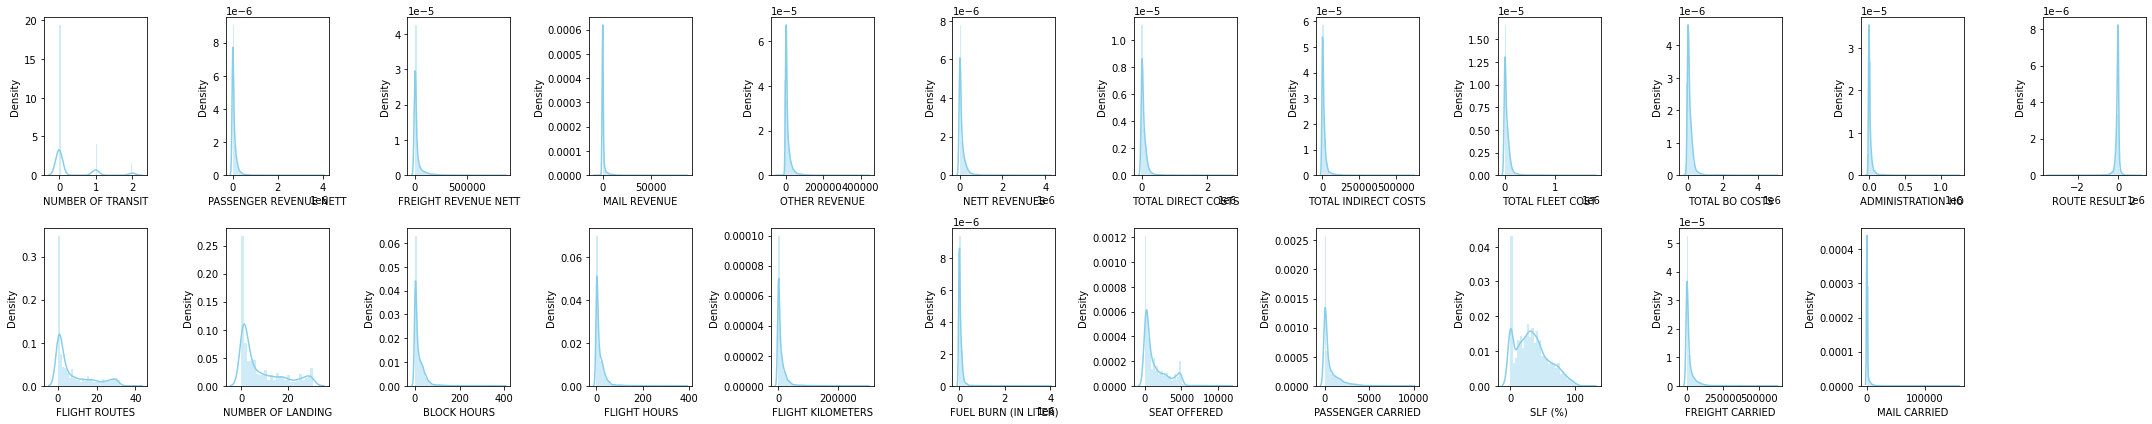

In [ ]:
plt.figure(figsize=(30,6))
features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=data[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

* None has symmetric distribution
* Almost of all features are slight positevely skew distribution

In [ ]:
data['RESULT'] = data['ROUTE RESULT 2'].apply(lambda x: 'Negative' if x <=0 else 'Positive')
data.head(5)

,PERIODE,SERVICE TYPE,DEP,ARR,ROUTE,NUMBER OF TRANSIT,PASSENGER REVENUE NETT,FREIGHT REVENUE NETT,MAIL REVENUE,OTHER REVENUE,...,FLIGHT HOURS,FLIGHT KILOMETERS,FUEL BURN (IN LITER),SEAT OFFERED,PASSENGER CARRIED,SLF (%),FREIGHT CARRIED,MAIL CARRIED,AIRCRAFT TYPE GROUPING,RESULT
0,JAN,DOM,MES,CGK,MES-CGK,0,172143,40131,496,14462,...,21,13910,144359,2600,1584,61.0,45290,549.0,A332,Negative
1,JAN,DOM,CGK,MES,CGK-MES,0,247717,117986,509,30061,...,21,15301,155832,2860,2257,79.0,94354,632.0,A332,Negative
2,JAN,DOM,MES,CGK,MES-CGK,0,27418,2504,0,1706,...,2,1391,14744,251,249,99.0,2950,0.0,A333,Positive
3,JAN,DOM,CGK,MES,CGK-MES,0,22833,2830,0,1535,...,2,1391,13889,251,218,87.0,2572,0.0,A333,Positive
4,JAN,DOM,CGK,MES,CGK-MES,0,25733,4234,410,1880,...,2,1391,13258,222,197,89.0,3387,443.0,A332,Negative


In [ ]:
result_count = data.groupby(['RESULT','AIRCRAFT TYPE GROUPING'],as_index=False).size()
result_count

,RESULT,AIRCRAFT TYPE GROUPING,size
0,Negative,A332,344
1,Negative,A333,855
2,Negative,A339,127
3,Negative,AT7,102
4,Negative,B738NG,4410
5,Negative,B773ER,244
6,Negative,C10,692
7,Positive,A332,28
8,Positive,A333,112
9,Positive,A339,25


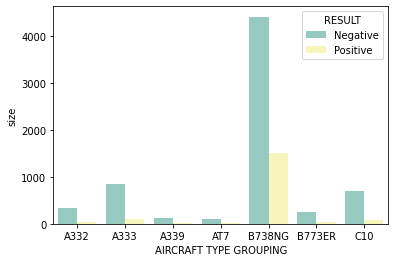

In [ ]:
sns.barplot(x=result_count['AIRCRAFT TYPE GROUPING'],
            y=result_count['size'],
            hue=result_count['RESULT'],
            palette="Set3"
           )
plt.show()

B738NG had largest negative route result even-though they also gave the positive route result. 

In [ ]:
def print_cat_unique(data):
    for column in data:
        if data[column].dtypes == 'object':
            print(f'{column} : {data[column].unique()}')

In [ ]:
# membuat label encoding untuk unique value periode

data['PERIODE'].replace({'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6, 'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12}, inplace=True)

In [ ]:
resultmonthly_count = data.groupby(['RESULT','PERIODE'],as_index=False).size()
resultmonthly_count

,RESULT,PERIODE,size
0,Negative,1,543
1,Negative,2,550
2,Negative,3,816
3,Negative,4,606
4,Negative,5,321
5,Negative,6,359
6,Negative,7,418
7,Negative,8,511
8,Negative,9,568
9,Negative,10,753


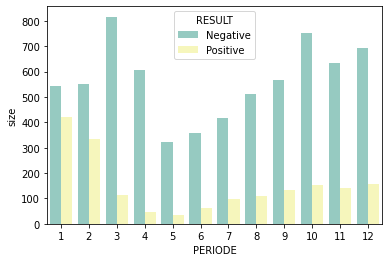

In [ ]:
sns.barplot(x=resultmonthly_count['PERIODE'],
            y=resultmonthly_count['size'],
            hue=resultmonthly_count['RESULT'],
            palette="Set3"
           )
plt.show()

Positive route-result dropped significantly after Feb 2020 because 

#Data Preprocessing

In [ ]:
data.drop(['NETT REVENUES', 'ROUTE'], axis=1, inplace=True)

Data Nett Revenues and Route should be dropped because there are duplicate features to other features

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8572 entries, 0 to 8571
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PERIODE                 8572 non-null   int64  
 1   SERVICE TYPE            8572 non-null   object 
 2   DEP                     8572 non-null   object 
 3   ARR                     8572 non-null   object 
 4   NUMBER OF TRANSIT       8572 non-null   int64  
 5   PASSENGER REVENUE NETT  8572 non-null   int64  
 6   FREIGHT REVENUE NETT    8572 non-null   int64  
 7   MAIL REVENUE            8572 non-null   int64  
 8   OTHER REVENUE           8572 non-null   int64  
 9   TOTAL DIRECT COSTS      8572 non-null   int64  
 10  TOTAL INDIRECT COSTS    8572 non-null   int64  
 11  TOTAL FLEET COST        8572 non-null   int64  
 12  TOTAL BO COSTS          8572 non-null   int64  
 13  ADMINISTRATION HO       8572 non-null   int64  
 14  ROUTE RESULT 2          8572 non-null   

##Missing Value

In [ ]:
data.isna().sum()

PERIODE                     0
SERVICE TYPE                0
DEP                         0
ARR                         0
NUMBER OF TRANSIT           0
PASSENGER REVENUE NETT      0
FREIGHT REVENUE NETT        0
MAIL REVENUE                0
OTHER REVENUE               0
TOTAL DIRECT COSTS          0
TOTAL INDIRECT COSTS        0
TOTAL FLEET COST            0
TOTAL BO COSTS              0
ADMINISTRATION HO           0
ROUTE RESULT 2              0
FLIGHT ROUTES               0
NUMBER OF LANDING           0
BLOCK HOURS                 0
FLIGHT HOURS                0
FLIGHT KILOMETERS           0
FUEL BURN (IN LITER)        0
SEAT OFFERED                0
PASSENGER CARRIED           0
SLF (%)                   937
FREIGHT CARRIED             0
MAIL CARRIED                2
AIRCRAFT TYPE GROUPING      0
RESULT                      0
dtype: int64

In [ ]:
data.isna().sum() * 100 / len(data)

PERIODE                    0.000000
SERVICE TYPE               0.000000
DEP                        0.000000
ARR                        0.000000
NUMBER OF TRANSIT          0.000000
PASSENGER REVENUE NETT     0.000000
FREIGHT REVENUE NETT       0.000000
MAIL REVENUE               0.000000
OTHER REVENUE              0.000000
TOTAL DIRECT COSTS         0.000000
TOTAL INDIRECT COSTS       0.000000
TOTAL FLEET COST           0.000000
TOTAL BO COSTS             0.000000
ADMINISTRATION HO          0.000000
ROUTE RESULT 2             0.000000
FLIGHT ROUTES              0.000000
NUMBER OF LANDING          0.000000
BLOCK HOURS                0.000000
FLIGHT HOURS               0.000000
FLIGHT KILOMETERS          0.000000
FUEL BURN (IN LITER)       0.000000
SEAT OFFERED               0.000000
PASSENGER CARRIED          0.000000
SLF (%)                   10.930938
FREIGHT CARRIED            0.000000
MAIL CARRIED               0.023332
AIRCRAFT TYPE GROUPING     0.000000
RESULT                     0

In [ ]:
data = data.dropna()

In [ ]:
data.isna().sum()

PERIODE                   0
SERVICE TYPE              0
DEP                       0
ARR                       0
NUMBER OF TRANSIT         0
PASSENGER REVENUE NETT    0
FREIGHT REVENUE NETT      0
MAIL REVENUE              0
OTHER REVENUE             0
TOTAL DIRECT COSTS        0
TOTAL INDIRECT COSTS      0
TOTAL FLEET COST          0
TOTAL BO COSTS            0
ADMINISTRATION HO         0
ROUTE RESULT 2            0
FLIGHT ROUTES             0
NUMBER OF LANDING         0
BLOCK HOURS               0
FLIGHT HOURS              0
FLIGHT KILOMETERS         0
FUEL BURN (IN LITER)      0
SEAT OFFERED              0
PASSENGER CARRIED         0
SLF (%)                   0
FREIGHT CARRIED           0
MAIL CARRIED              0
AIRCRAFT TYPE GROUPING    0
RESULT                    0
dtype: int64

In [ ]:
data.isnull().sum()

PERIODE                   0
SERVICE TYPE              0
DEP                       0
ARR                       0
NUMBER OF TRANSIT         0
PASSENGER REVENUE NETT    0
FREIGHT REVENUE NETT      0
MAIL REVENUE              0
OTHER REVENUE             0
TOTAL DIRECT COSTS        0
TOTAL INDIRECT COSTS      0
TOTAL FLEET COST          0
TOTAL BO COSTS            0
ADMINISTRATION HO         0
ROUTE RESULT 2            0
FLIGHT ROUTES             0
NUMBER OF LANDING         0
BLOCK HOURS               0
FLIGHT HOURS              0
FLIGHT KILOMETERS         0
FUEL BURN (IN LITER)      0
SEAT OFFERED              0
PASSENGER CARRIED         0
SLF (%)                   0
FREIGHT CARRIED           0
MAIL CARRIED              0
AIRCRAFT TYPE GROUPING    0
RESULT                    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7633 entries, 0 to 8571
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PERIODE                 7633 non-null   int64  
 1   SERVICE TYPE            7633 non-null   object 
 2   DEP                     7633 non-null   object 
 3   ARR                     7633 non-null   object 
 4   NUMBER OF TRANSIT       7633 non-null   int64  
 5   PASSENGER REVENUE NETT  7633 non-null   int64  
 6   FREIGHT REVENUE NETT    7633 non-null   int64  
 7   MAIL REVENUE            7633 non-null   int64  
 8   OTHER REVENUE           7633 non-null   int64  
 9   TOTAL DIRECT COSTS      7633 non-null   int64  
 10  TOTAL INDIRECT COSTS    7633 non-null   int64  
 11  TOTAL FLEET COST        7633 non-null   int64  
 12  TOTAL BO COSTS          7633 non-null   int64  
 13  ADMINISTRATION HO       7633 non-null   int64  
 14  ROUTE RESULT 2          7633 non-null   

There are missing value in 'SLF (%)' feature 10.93% then it should be dropped.

##Data Duplicate

In [ ]:
data.duplicated().sum()

0

##Label Encoding

In [ ]:
print_cat_unique(data)

SERVICE TYPE : ['DOM' 'INT']
DEP : ['MES' 'CGK' 'PDG' 'PKU' 'PLM' 'DJB' 'TJQ' 'BKS' 'FLZ' 'DPS' 'GNS' 'MDC'
 'TKG' 'PGK' 'BTJ' 'BTH' 'JOG' 'SRG' 'TNJ' 'MLG' 'AMI' 'KOE' 'PNK' 'BDJ'
 'PKY' 'BPN' 'AMQ' 'TTE' 'YIA' 'BDO' 'SUB' 'LBJ' 'UPG' 'SOC' 'BWX' 'SRI'
 'KDI' 'PLW' 'GTO' 'DJJ' 'MKQ' 'SOQ' 'BIK' 'NBX' 'TIM' 'BEJ' 'MJU' 'SIN'
 'KUL' 'BKK' 'DVO' 'ICN' 'HND' 'KIX' 'NGO' 'TYO' 'SHA' 'BJS' 'CAN' 'CGO'
 'XIY' 'HKG' 'SYD' 'MEL' 'PER' 'AMS' 'LHR' 'JED' 'MED' 'TRK']
ARR : ['CGK' 'MES' 'PDG' 'PKU' 'DJB' 'PLM' 'TJQ' 'BKS' 'FLZ' 'DPS' 'GNS' 'MDC'
 'TKG' 'PGK' 'BTJ' 'BTH' 'JOG' 'SRG' 'TNJ' 'MLG' 'AMI' 'KOE' 'PNK' 'BDJ'
 'PKY' 'BPN' 'AMQ' 'TTE' 'YIA' 'SUB' 'BDO' 'LBJ' 'UPG' 'SOC' 'BWX' 'SRI'
 'KDI' 'PLW' 'GTO' 'DJJ' 'MKQ' 'SOQ' 'NBX' 'BIK' 'TIM' 'BEJ' 'MJU' 'SIN'
 'KUL' 'BKK' 'DVO' 'ICN' 'HND' 'KIX' 'NGO' 'TYO' 'SHA' 'BJS' 'CAN' 'CGO'
 'XIY' 'HKG' 'SYD' 'MEL' 'PER' 'AMS' 'LHR' 'JED' 'MED' 'TRK']
AIRCRAFT TYPE GROUPING : ['A332' 'A333' 'A339' 'B738NG' 'B773ER' 'AT7' 'C10']
RESULT : ['Negative' 'Posit

In [ ]:
# membuat label encoding untuk unique value 'Dom' = 1 dan unique value 'Int' = 0

data['SERVICE TYPE'].replace({'DOM': 1, 'INT': 0}, inplace=True)

In [ ]:
# membuat label encoding untuk unique value wide body = 1, narrow body = 0

data['AIRCRAFT TYPE GROUPING'].replace({'A332': 1, 'A333': 1, 'A339': 1, 'B738NG': 0, 'B773ER': 1, 'AT7': 0, 'C10': 0}, inplace=True)

In [ ]:
# membuat label encoding untuk unique value DEP

data['DEP'].replace({'MES':1, 'CGK':2, 'PDG':1, 'PKU':1, 'PLM':1, 'DJB':1, 'TJQ':1, 'BKS':1, 'FLZ':1, 'DPS':3, 'GNS':1, 'MDC':5,
 'TKG':1, 'PGK':1, 'BTJ':1, 'BTH':1, 'JOG':2, 'SRG':2, 'TNJ':1, 'MLG':2, 'AMI':3, 'KOE':3, 'PNK':4, 'BDJ':4,
 'PKY':4, 'BPN':4, 'AMQ':6, 'TTE':6, 'YIA':2, 'BDO':2, 'SUB':2, 'LBJ':3, 'UPG':5, 'SOC':2, 'BWX':2, 'SRI':4,
 'KDI':5, 'PLW':5, 'GTO':5, 'DJJ':6, 'MKQ':6, 'SOQ':6, 'BIK':6, 'NBX':6, 'TIM':6, 'BEJ':4, 'MJU':5, 'SIN':0,
 'KUL':0, 'BKK':0, 'DVO':0, 'ICN':0, 'HND':0, 'KIX':0, 'NGO':0, 'TYO':0, 'SHA':0, 'BJS':0, 'CAN':0, 'CGO':0,
 'XIY':0, 'HKG':0, 'SYD':0, 'MEL':0, 'PER':0, 'AMS':0, 'LHR':0, 'JED':0, 'MED':0, 'TRK':4,}, inplace=True)

In [ ]:
# membuat label encoding untuk unique value ARR

data['ARR'].replace({'MES':1, 'CGK':2, 'PDG':1, 'PKU':1, 'PLM':1, 'DJB':1, 'TJQ':1, 'BKS':1, 'FLZ':1, 'DPS':3, 'GNS':1, 'MDC':5,
 'TKG':1, 'PGK':1, 'BTJ':1, 'BTH':1, 'JOG':2, 'SRG':2, 'TNJ':1, 'MLG':2, 'AMI':3, 'KOE':3, 'PNK':4, 'BDJ':4,
 'PKY':4, 'BPN':4, 'AMQ':6, 'TTE':6, 'YIA':2, 'BDO':2, 'SUB':2, 'LBJ':3, 'UPG':5, 'SOC':2, 'BWX':2, 'SRI':4,
 'KDI':5, 'PLW':5, 'GTO':5, 'DJJ':6, 'MKQ':6, 'SOQ':6, 'BIK':6, 'NBX':6, 'TIM':6, 'BEJ':4, 'MJU':5, 'SIN':0,
 'KUL':0, 'BKK':0, 'DVO':0, 'ICN':0, 'HND':0, 'KIX':0, 'NGO':0, 'TYO':0, 'SHA':0, 'BJS':0, 'CAN':0, 'CGO':0,
 'XIY':0, 'HKG':0, 'SYD':0, 'MEL':0, 'PER':0, 'AMS':0, 'LHR':0, 'JED':0, 'MED':0, 'TRK':4,}, inplace=True)

In [ ]:
# membuat label encoding untuk unique value 'Negative' = 0 dan unique value 'Positive' = 1

data['RESULT'].replace({'Negative': 0, 'Positive': 1}, inplace=True)

In [ ]:
print_cat_unique(data)

In [ ]:
data.head()

,PERIODE,SERVICE TYPE,DEP,ARR,NUMBER OF TRANSIT,PASSENGER REVENUE NETT,FREIGHT REVENUE NETT,MAIL REVENUE,OTHER REVENUE,TOTAL DIRECT COSTS,...,FLIGHT HOURS,FLIGHT KILOMETERS,FUEL BURN (IN LITER),SEAT OFFERED,PASSENGER CARRIED,SLF (%),FREIGHT CARRIED,MAIL CARRIED,AIRCRAFT TYPE GROUPING,RESULT
0,1,1,1,2,0,172143,40131,496,14462,214416,...,21,13910,144359,2600,1584,61.0,45290,549.0,1,0
1,1,1,2,1,0,247717,117986,509,30061,221521,...,21,15301,155832,2860,2257,79.0,94354,632.0,1,0
2,1,1,1,2,0,27418,2504,0,1706,15600,...,2,1391,14744,251,249,99.0,2950,0.0,1,1
3,1,1,2,1,0,22833,2830,0,1535,13394,...,2,1391,13889,251,218,87.0,2572,0.0,1,1
4,1,1,2,1,0,25733,4234,410,1880,17403,...,2,1391,13258,222,197,89.0,3387,443.0,1,0


##Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_scale = ['PASSENGER REVENUE NETT', 'FREIGHT REVENUE NETT', 'OTHER REVENUE','TOTAL DIRECT COSTS','TOTAL INDIRECT COSTS','TOTAL FLEET COST','TOTAL BO COSTS',
              'ADMINISTRATION HO','ROUTE RESULT 2','FLIGHT KILOMETERS','FUEL BURN (IN LITER)','SEAT OFFERED','PASSENGER CARRIED','FREIGHT CARRIED','MAIL CARRIED']
data[cols_scale] = scaler.fit_transform(data[cols_scale])

In [ ]:
data.head()

,PERIODE,SERVICE TYPE,DEP,ARR,NUMBER OF TRANSIT,PASSENGER REVENUE NETT,FREIGHT REVENUE NETT,MAIL REVENUE,OTHER REVENUE,TOTAL DIRECT COSTS,...,FLIGHT HOURS,FLIGHT KILOMETERS,FUEL BURN (IN LITER),SEAT OFFERED,PASSENGER CARRIED,SLF (%),FREIGHT CARRIED,MAIL CARRIED,AIRCRAFT TYPE GROUPING,RESULT
0,1,1,1,2,0,0.440458,0.301621,496,0.166907,0.787770,...,21,0.134417,0.395374,0.590160,0.945397,61.0,0.608548,-0.112762,1,0
1,1,1,2,1,0,0.813328,1.731257,509,0.968416,0.830385,...,21,0.209720,0.462078,0.747244,1.643704,79.0,1.839642,-0.094308,1,0
2,1,1,1,2,0,-0.273593,-0.389316,0,-0.488522,-0.404713,...,2,-0.543317,-0.358201,-0.829026,-0.439803,99.0,-0.453831,-0.234827,1,1
3,1,1,2,1,0,-0.296215,-0.383330,0,-0.497309,-0.417945,...,2,-0.543317,-0.363172,-0.829026,-0.471968,87.0,-0.463316,-0.234827,1,1
4,1,1,2,1,0,-0.281907,-0.357548,410,-0.479582,-0.393899,...,2,-0.543317,-0.366840,-0.846547,-0.493758,89.0,-0.442866,-0.136330,1,0


##Multicollinear Features

In [ ]:
data.drop(['RESULT'], axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7633 entries, 0 to 8571
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PERIODE                 7633 non-null   int64  
 1   SERVICE TYPE            7633 non-null   int64  
 2   DEP                     7633 non-null   int64  
 3   ARR                     7633 non-null   int64  
 4   NUMBER OF TRANSIT       7633 non-null   int64  
 5   PASSENGER REVENUE NETT  7633 non-null   float64
 6   FREIGHT REVENUE NETT    7633 non-null   float64
 7   MAIL REVENUE            7633 non-null   int64  
 8   OTHER REVENUE           7633 non-null   float64
 9   TOTAL DIRECT COSTS      7633 non-null   float64
 10  TOTAL INDIRECT COSTS    7633 non-null   float64
 11  TOTAL FLEET COST        7633 non-null   float64
 12  TOTAL BO COSTS          7633 non-null   float64
 13  ADMINISTRATION HO       7633 non-null   float64
 14  ROUTE RESULT 2          7633 non-null   

In [ ]:
from sklearn.model_selection import train_test_split

feature = data.drop(columns='ROUTE RESULT 2')
target = data[['ROUTE RESULT 2']]

feature_data_pretrain, feature_data_test, target_data_pretrain, target_data_test = train_test_split(feature, target, test_size=0.20, random_state=42)

feature_data_train, feature_data_validation, target_data_train, target_data_validation = train_test_split(feature_data_pretrain, target_data_pretrain, test_size=0.20, random_state=42)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_data_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,PERIODE,1.530957
2,SERVICE TYPE,2.455088
3,DEP,1.452063
4,ARR,1.405991
5,NUMBER OF TRANSIT,2.064494
6,PASSENGER REVENUE NETT,13.658873
7,FREIGHT REVENUE NETT,5.338145
8,MAIL REVENUE,5.545071
9,OTHER REVENUE,5.515403
10,TOTAL DIRECT COSTS,320.264207


There are `TOTAL DIRECT COSTS`,`TOTAL FLEET COST`,`TOTAL BO COSTS`, `BLOCK HOURS`,`FLIGHT HOURS` and `FLIGHT KILOMETERS`, the features with high VIF Scores

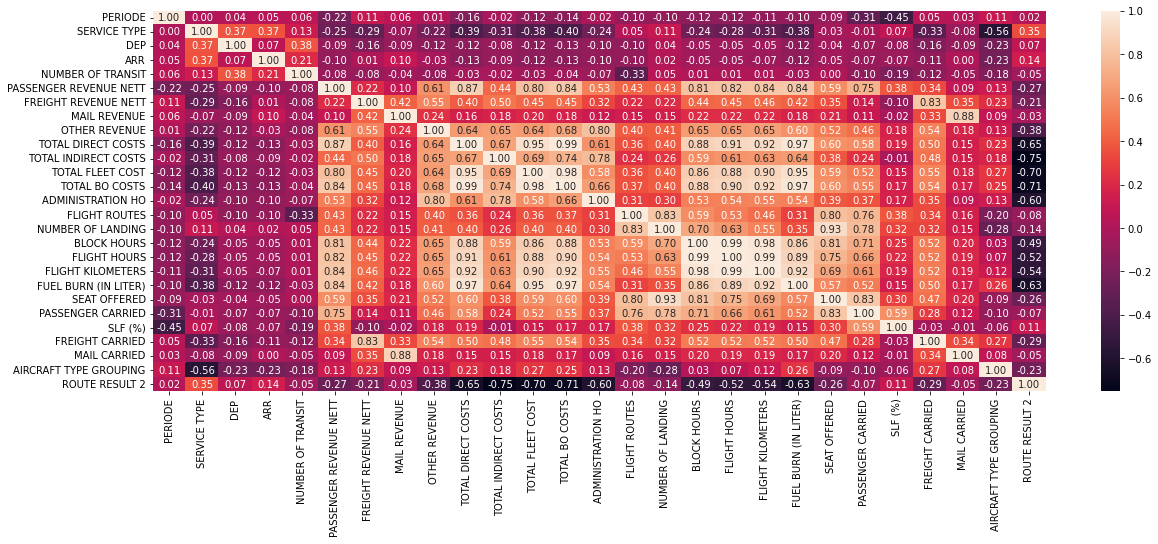

In [ ]:
data_train = pd.concat([feature_data_train, target_data_train], axis=1)
corr = data_train.corr()

plt.figure(figsize=(20,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [ ]:
feature_data_train = feature_data_train.drop(columns=['TOTAL DIRECT COSTS','TOTAL FLEET COST','BLOCK HOURS','FLIGHT HOURS','FLIGHT KILOMETERS'])
feature_data_validation = feature_data_validation.drop(columns=['TOTAL DIRECT COSTS','TOTAL FLEET COST','BLOCK HOURS','FLIGHT HOURS','FLIGHT KILOMETERS'])
feature_data_test = feature_data_test.drop(columns=['TOTAL DIRECT COSTS','TOTAL FLEET COST','BLOCK HOURS','FLIGHT HOURS','FLIGHT KILOMETERS'])

Retain `TOTAL BO COSTS` because the correlation value of `TOTAL BO COSTS` to `ROUTE RESULT 2` as target feature, is higher than `TOTAL DIRECT COSTS`,`TOTAL FLEET COST`,`TOTAL BO COSTS`, `BLOCK HOURS`,`FLIGHT HOURS` and `FLIGHT KILOMETERS`. Hence, we need to drop `TOTAL DIRECT COSTS`,`TOTAL FLEET COST`,`TOTAL BO COSTS`, `BLOCK HOURS`,`FLIGHT HOURS` and `FLIGHT KILOMETERS`.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_data_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,PERIODE,1.512578
2,SERVICE TYPE,2.213417
3,DEP,1.406775
4,ARR,1.364981
5,NUMBER OF TRANSIT,2.060351
6,PASSENGER REVENUE NETT,11.006252
7,FREIGHT REVENUE NETT,5.148976
8,MAIL REVENUE,5.277285
9,OTHER REVENUE,5.118691
10,TOTAL INDIRECT COSTS,5.516404


There are `PASSENGER REVENUE NETT`, `TOTAL BO COSTS`, `NUMBER OF LANDING` `FLIGHT KILOMETERS`, `FUEL BURN (IN LITER)`, `SEAT OFFERED`, `PASSENGER CARRIED` the features with high VIF Scores

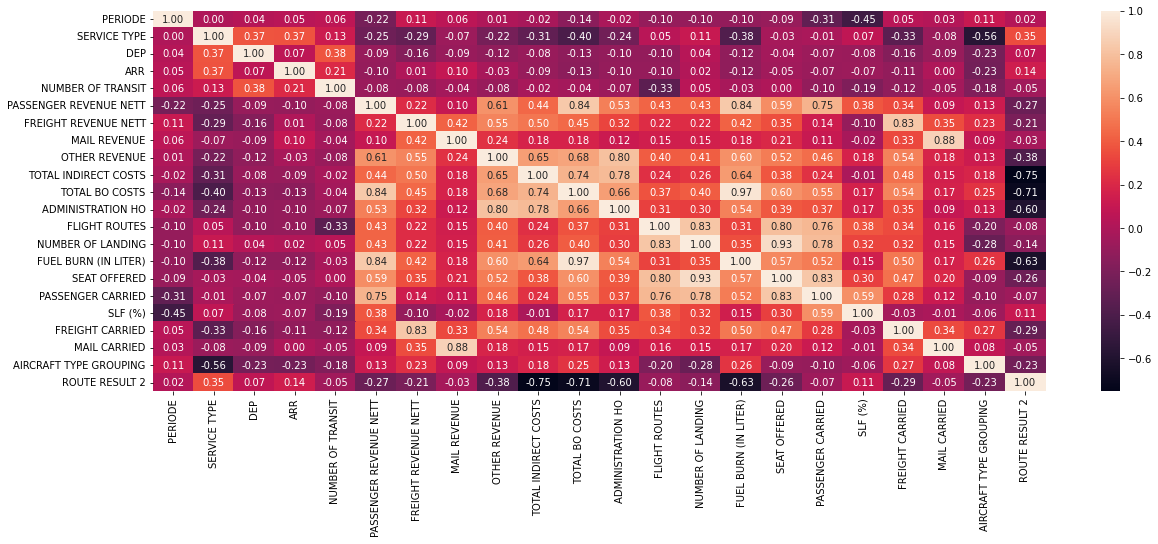

In [ ]:
data_train = pd.concat([feature_data_train, target_data_train], axis=1)
corr = data_train.corr()

plt.figure(figsize=(20,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [ ]:
feature_data_train = feature_data_train.drop(columns=['PASSENGER REVENUE NETT','NUMBER OF LANDING','FUEL BURN (IN LITER)','SEAT OFFERED','PASSENGER CARRIED'])
feature_data_validation = feature_data_validation.drop(columns=['PASSENGER REVENUE NETT','NUMBER OF LANDING','FUEL BURN (IN LITER)','SEAT OFFERED','PASSENGER CARRIED'])
feature_data_test = feature_data_test.drop(columns=['PASSENGER REVENUE NETT','NUMBER OF LANDING','FUEL BURN (IN LITER)','SEAT OFFERED','PASSENGER CARRIED'])

Retain `TOTAL BO COSTS` because the correlation value of `TOTAL BO COSTS` to `ROUTE RESULT 2` as target feature, is higher than `PASSENGER REVENUE NETT`,`NUMBER OF LANDING`,`FUEL BURN (IN LITER)`, `SEAT OFFERED`, and `PASSENGER CARRIED`. Hence, we need to drop `PASSENGER REVENUE NETT`,`NUMBER OF LANDING`,`FUEL BURN (IN LITER)`, `SEAT OFFERED`, and `PASSENGER CARRIED`.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_data_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,PERIODE,1.384968
2,SERVICE TYPE,2.105461
3,DEP,1.378516
4,ARR,1.336752
5,NUMBER OF TRANSIT,1.466961
6,FREIGHT REVENUE NETT,4.821398
7,MAIL REVENUE,5.258263
8,OTHER REVENUE,4.781369
9,TOTAL INDIRECT COSTS,4.426368
10,TOTAL BO COSTS,3.575173


#Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

# train the model
X_data_train = feature_data_train.to_numpy()
y_data_train = target_data_train.to_numpy()
y_data_train = y_data_train.reshape(len(y_data_train),)

# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_data_train, y_data_train)
ridge_reg_pointone.fit(X_data_train, y_data_train)
ridge_reg_one.fit(X_data_train, y_data_train)
ridge_reg_ten.fit(X_data_train, y_data_train)

Ridge(alpha=10, random_state=42)

## Find the best model (alpha)

In [ ]:
from sklearn.metrics import mean_squared_error

X_data_validation = feature_data_validation.to_numpy()
y_data_validation = target_data_validation.to_numpy()
y_data_validation = y_data_validation.reshape(len(y_data_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_data_validation)
    rmse = np.sqrt(mean_squared_error(y_data_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 0.6257990477001197
RMSE of Ridge regression model with alpha = 0.1 is 0.625796520859484
RMSE of Ridge regression model with alpha = 1.0 is 0.6257713358961792
RMSE of Ridge regression model with alpha = 10 is 0.6255276375556095


The best model using ridge regression is regression using alpha 10



## Model Evaluation

In [ ]:
ridge_best = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_data_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,-0.342077
1,PERIODE,-0.001840
2,SERVICE TYPE,0.021559
3,DEP,0.017816
4,ARR,0.007893
5,NUMBER OF TRANSIT,-0.046927
6,FREIGHT REVENUE NETT,0.210423
7,MAIL REVENUE,0.000020
8,OTHER REVENUE,0.344360
9,TOTAL INDIRECT COSTS,-0.455299


This is the best model (with the alpha = 10). 
We found that the biggest factor is Total BO Cost (total branch office cost). Additional total branch office cost will add the probability of route result as amount of 56% 

### Diagnostic Study

In [ ]:
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_data_train)

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_data_train)))

R-squared for training data is 0.6626645459504226


This is the moderate model because the r-squared is only 0.66. According to Chin (1998), the highest model usually has the r-squared of more than 0.67, which means the combination between each independent variable is strong enough to affect the value of the dependent variable.

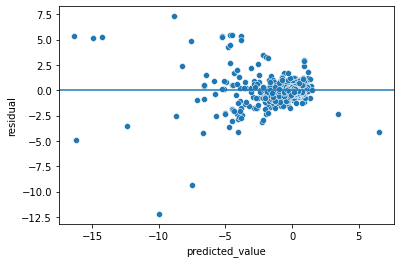

In [ ]:
# calculate residuals
residual = y_data_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

### Training Error

In [ ]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_data_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_data_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_predict_train, y_data_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_predict_train, y_data_train)))

RMSE for training data is 0.5149147800978745
MAE for training data is 0.2275865793451933
MAPE for training data is 4.157409778539281


Mean of absolute basis (MAE) of the model during the training phase showed a value of 0.22. The model's prediction deviates 0.22 points from the actual data on average.

The mean Absolute Percentage Error (MAPE) of the model's prediction is about 4.15% relative to the actual data on average.

### Testing Error

In [ ]:
# prepare prediction result on test data
X_data_test = feature_data_test.to_numpy()
y_predict_test = ridge_best.predict(X_data_test)

# ground truth target
y_data_test = target_data_test.to_numpy()
y_data_test = y_data_test.reshape(len(y_data_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_data_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_predict_test, y_data_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_predict_test, y_data_test)))

RMSE for testing data is 0.44937137794905074
MAE for testing data is 0.21279306862427189
MAPE for testing data is 1.928652551644019


Mean of absolute basis (MAE) of the model during the testing phase showed a value of 0.21. It means the model's prediction deviates 0.21 points from the actual data on average.

The mean Absolute Percentage Error (MAPE) of the model's prediction is about 1.92% relative to the actual data on average.

The number of MAPE during the training and testing phases using ridge regression is different significant when the MAPE during testing lower than training phase.


#Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

# define the model
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_data_train, y_data_train)
lasso_reg_pointone.fit(X_data_train, y_data_train)
lasso_reg_one.fit(X_data_train, y_data_train)
lasso_reg_ten.fit(X_data_train, y_data_train)

Lasso(alpha=10, random_state=42)

## Find the best model (alpha)

In [ ]:
from sklearn.metrics import mean_squared_error

X_data_validation = feature_data_validation.to_numpy()
y_data_validation = target_data_validation.to_numpy()
y_data_validation = y_data_validation.reshape(len(y_data_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_data_validation)
    rmse = np.sqrt(mean_squared_error(y_data_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 0.6261351655479954
RMSE of Ridge regression model with alpha = 0.1 is 0.6459536863428631
RMSE of Ridge regression model with alpha = 1.0 is 0.8837187053341614
RMSE of Ridge regression model with alpha = 10 is 0.8874135876303512


## Model Evaluation

In [ ]:
lasso_best = lasso_reg_pointzeroone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_data_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,-0.367066
1,PERIODE,-0.000441
2,SERVICE TYPE,0.000000
3,DEP,0.012385
4,ARR,0.013893
5,NUMBER OF TRANSIT,-0.000000
6,FREIGHT REVENUE NETT,0.162726
7,MAIL REVENUE,0.000016
8,OTHER REVENUE,0.297002
9,TOTAL INDIRECT COSTS,-0.450163


This is the best model (with the alpha = 0.01). 
We found that the biggest factor is Total BO Cost (total branch office cost). Additional total branch office cost will add the probability of route result as amount of 56% 

### Diagnostic Study

In [ ]:
from sklearn.metrics import r2_score

y_predict_train = lasso_best.predict(X_data_train)

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_data_train)))

R-squared for training data is 0.6427398525328352


This is the moderate model because the r-squared is only 0.64. According to Chin (1998), the highest model usually has the r-squared of more than 0.67, which means the combination between each independent variable is strong enough to affect the value of the dependent variable.

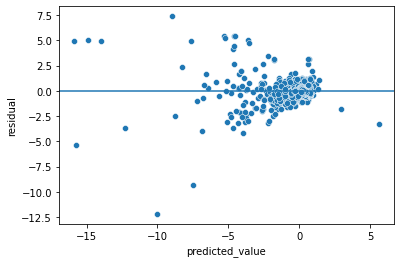

In [ ]:
# calculate residuals
residual = y_data_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

###Training Error

In [ ]:
# prepare prediction result on train data
y_predict_train = lasso_best.predict(X_data_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_data_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_predict_train, y_data_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_predict_train, y_data_train)))

RMSE for training data is 0.5178932161119564
MAE for training data is 0.2296522829483946
MAPE for training data is 2.7750031874150776


Mean of absolute basis (MAE) of the model during the training phase showed a value of 0.22. The model's prediction deviates 0.22 points from the actual data on average.

The mean Absolute Percentage Error (MAPE) of the model's prediction is about 2.77% relative to the actual data on average.

### Testing Error

In [ ]:
# prepare prediction result on test data
X_data_test = feature_data_test.to_numpy()
y_predict_test = lasso_best.predict(X_data_test)

# ground truth target
y_data_test = target_data_test.to_numpy()
y_data_test = y_data_test.reshape(len(y_data_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_data_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_predict_test, y_data_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_predict_test, y_data_test)))

RMSE for testing data is 0.4506866486029008
MAE for testing data is 0.21119381270021942
MAPE for testing data is 3.2830389328722895


Mean of absolute basis (MAE) of the model during the testing phase showed a value of 0.21. It means the model's prediction deviates 0.21 points from the actual data on average.

The mean Absolute Percentage Error (MAPE) of the model's prediction is about 3.28% relative to the actual data on average.

The number of MAPE during the training and testing phases using ridge regression is different significant when the MAPE during testing higher than training phase.


#Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# train the model
X_data_train = feature_data_train.to_numpy()
y_data_train = target_data_train.to_numpy()
y_data_train = y_data_train.reshape(len(y_data_train),)

# define the model
rf_regressor = RandomForestRegressor(random_state=42)

# fit the model (training)
rf = rf_regressor.fit(X_data_train, y_data_train)

In [ ]:
from sklearn.metrics import mean_squared_error

X_data_validation = feature_data_validation.to_numpy()
y_data_validation = target_data_validation.to_numpy()
y_data_validation = y_data_validation.reshape(len(y_data_validation),)

models = rf_regressor
y_predict_validation = models.predict(X_data_validation)
rmse = np.sqrt(mean_squared_error(y_data_validation,y_predict_validation))
print(f'RMSE of Random Forest regression is {rmse}')

RMSE of Random Forest regression is 0.32843059557947013


In [ ]:
rf.feature_importances_

array([0.0113437 , 0.00278115, 0.00626167, 0.0066809 , 0.00667597,
       0.03383073, 0.00426936, 0.04621714, 0.30327686, 0.38747436,
       0.03334073, 0.05836779, 0.08447093, 0.00884618, 0.00378139,
       0.00238114])

Using this model, we found that the biggest factor is Total BO Cost (total branch office cost). Additional total branch office cost will add the probability of route result as amount of 38.7% 

In [ ]:
from sklearn.metrics import r2_score

y_predict_train = rf.predict(X_data_train)

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_data_train)))

R-squared for training data is 0.981443990020993


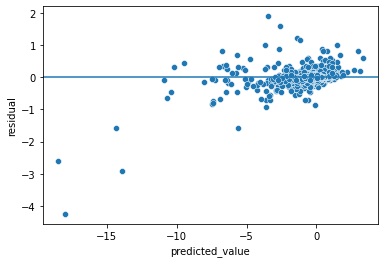

In [ ]:
# calculate residuals
residual = y_data_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

In [ ]:
# prepare prediction result on train data
y_predict_train = rf.predict(X_data_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_data_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_predict_train, y_data_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_predict_train, y_data_train)))

RMSE for training data is 0.13108675897840497
MAE for training data is 0.03794419721072781
MAPE for training data is 0.28460738268628033


Mean of absolute basis (MAE) of the Random Forest Regressor Model during the training showed a value of 0.03. It means the model's prediction deviates 0.03 points from the actual data on average.

The mean Absolute Percentage Error (MAPE) of the model's prediction during the training is about 0.28% relative to the actual data on average.


In [ ]:
# prepare prediction result on test data
X_data_test = feature_data_test.to_numpy()
y_predict_test = rf.predict(X_data_test)

# ground truth target
y_data_test = target_data_test.to_numpy()
y_data_test = y_data_test.reshape(len(y_data_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_data_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_predict_test, y_data_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_predict_test, y_data_test)))

RMSE for testing data is 0.31492107840099115
MAE for testing data is 0.092125294462268
MAPE for testing data is 0.8063804610645864


Mean of absolute basis (MAE) of the Random Forest Regressor Model during the testing showed a value of 0.09. It means the model's prediction deviates 0.09 points from the actual data on average.

The mean Absolute Percentage Error (MAPE) of the model's prediction during the testing is about 0.80% relative to the actual data on average.



#XG Boost Regression

In [ ]:
from xgboost import XGBRegressor

# train the model
X_data_train = feature_data_train.to_numpy()
y_data_train = target_data_train.to_numpy()
y_data_train = y_data_train.reshape(len(y_data_train),)

# define the model
xg_regressor = XGBRegressor(random_state=42)

# fit the model (training)
xg = xg_regressor.fit(X_data_train, y_data_train)

[08:36:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
from sklearn.metrics import mean_squared_error

X_data_validation = feature_data_validation.to_numpy()
y_data_validation = target_data_validation.to_numpy()
y_data_validation = y_data_validation.reshape(len(y_data_validation),)

models = xg_regressor
y_predict_validation = models.predict(X_data_validation)
rmse = np.sqrt(mean_squared_error(y_data_validation,y_predict_validation))
print(f'RMSE of XG Boost regression is {rmse}')

RMSE of XG Boost regression is 0.34117482141516986


In [ ]:
xg.feature_importances_

array([0.01730053, 0.05369561, 0.00700971, 0.06610444, 0.12857446,
       0.02240889, 0.02492884, 0.01917914, 0.1871801 , 0.1881355 ,
       0.01719836, 0.16886802, 0.06401104, 0.01709661, 0.00365404,
       0.01465467], dtype=float32)

Using this model, we found that the biggest factor is Total BO Cost (total branch office cost). Additional total branch office cost will add the probability of route result as amount of 18.81% 

In [ ]:
from sklearn.metrics import r2_score

y_predict_train = xg.predict(X_data_train)

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_data_train)))

R-squared for training data is 0.9688366411399546


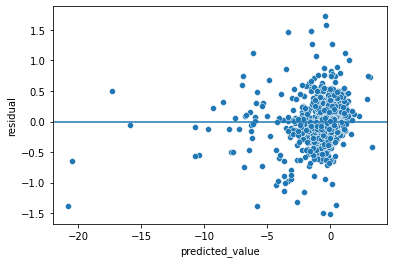

In [ ]:
# calculate residuals
residual = y_data_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

In [ ]:
# prepare prediction result on train data
y_predict_train = xg.predict(X_data_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_data_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_predict_train, y_data_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_predict_train, y_data_train)))

RMSE for training data is 0.17321254001847536
MAE for training data is 0.09924598641796162
MAPE for training data is 1.8178686419958179


Mean of absolute basis (MAE) of the XG Boost Regressor Model during training showed a value of 0.09. It means the model's prediction deviates 0.12 points from the actual data on average.

The mean Absolute Percentage Error (MAPE) of the model's prediction is about 1.81% relative to the actual data on average.


In [ ]:
# prepare prediction result on test data
X_data_test = feature_data_test.to_numpy()
y_predict_test = xg.predict(X_data_test)

# ground truth target
y_data_test = target_data_test.to_numpy()
y_data_test = y_data_test.reshape(len(y_data_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_data_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_predict_test, y_data_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_predict_test, y_data_test)))

RMSE for testing data is 0.3201661660416243
MAE for testing data is 0.12178206143603565
MAPE for testing data is 6.699915540853545


Mean of absolute basis (MAE) of the XG Boost Regressor Model during testing showed a value of 0.12. It means the model's prediction deviates 0.12 points from the actual data on average.

The mean Absolute Percentage Error (MAPE) of the model's prediction is about 6.60% relative to the actual data on average.


#Conclusion

**1. RIDGE REGRESSION**

> *   R Squared : 66.26%
> *   MAE :  0.212 point from actual data
> *   MAPE : 1.928%

**2. LASSO REGRESSION**

> *   R Squared : 64.27%
> *   MAE :  0.212 point from actual data
> *   MAPE : 1.928%

**3. RANDOM FOREST REGRESSION**

> *   R Squared : 98.14%
> *   MAE :  0.09 point from actual data
> *   MAPE : 0.80%

**4. XG BOOST REGRESSION**

> *   R Squared : 96.88%
> *   MAE :  0.12 point from actual data
> *   MAPE : 6.69%

Random Forest Regression is the best model that give the highest R squared : 98.14% and the lowest Mean of Absolute Basis (MAE) 0.09 point from actual data.

Using this Random Forest Regression, we found that the biggest factor is Total BO Cost (total branch office cost). Additional total branch office cost will add the probability of route result as amount of 38.7%. Other factor is indirect cost which influence about 30.32%.

Doing efficiency in branch office and efficiency in indirect cost, will be significant action to reduce the loss in route result about 69.02%.

